# fitting gaussian mixture models

In [10]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [16]:
# first, let's create some data from two gaussians
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pl
from sklearn.mixture import GMM



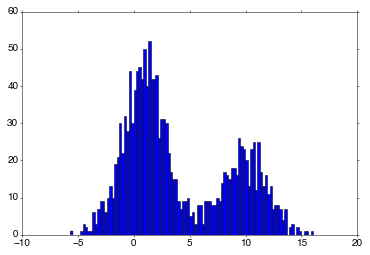

In [37]:
a = np.random.normal(1,2,1000)
b = np.random.normal(10,2,500)
c = np.hstack((a,b))
pl.hist(c,100);

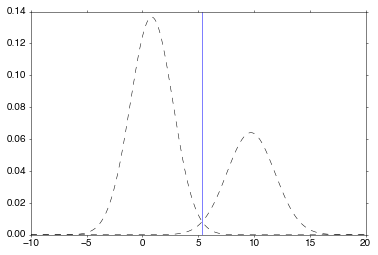

In [67]:
# now let's fit a gaussian mixture model
gmm = GMM(n_components = 2)
gmm = gmm.fit(X=np.expand_dims(c,1))


x = np.linspace(-10,20,1000)
logprob, responsibilities = gmm.score_samples(np.expand_dims(x,1))

pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

# pl.hist(c,100);
# pl.plot(x, pdf, '-k')
pl.plot(x, pdf_individual, '--k')

np.shape(pdf_individual)

pl.axvline(x[np.where(pdf_individual[:,0]>pdf_individual[:,1])[0]][0])


In [ ]:
# now find value that maximally separates the distributions


In [81]:

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::
    """
    return np.arccos(np.dot(v1, v2))

In [83]:
v1 = np.array([1,0])
v2 = np.array([-2,0])
print angle_between(v1,v2)

TypeError: 'axis' is an invalid keyword argument for this function

In [86]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [90]:
v1 = [1,0]
v2 = [-1,-0.5]
angle_between(v1,v2)

2.677945044588987